Optimization

In [8]:
import os
import numpy as np
from hidden import dynamics, infer
# This is only if you want to use non-default optimization routines (global)
from hidden.optimize.base import OptClass

# Initializedynamics
hmm = dynamics.HMM(2, 2)
#hmm=dynamics.HMM(3,3) 
hmm.init_uniform_cycle(0.2, 0.1) 
#(0.2,0.1,0.05)
hmm.A, hmm.B

(array([[0.8, 0.2],
        [0.2, 0.8]]),
 array([[0.9, 0.1],
        [0.1, 0.9]]))

In [9]:
hmm.run_dynamics(250)

In [10]:
import pandas as pd
obs_ts=pd.read_csv("C:/Users/arumana/OneDrive - Viewpoint Capital Corporation/Documents/sample_1_2d.csv")
obs_ts

,1
0,1
1,1
2,1
3,0
4,1
...,...
94,1
95,0
96,0
97,0


In [11]:
# Initialize infer object
analyzer = infer.MarkovInfer(2, 2)

In [12]:
# Now we can use initial 'guesses' for A and B to pass into the optimizer
A_init = np.array([
    [0.75, 0.3],
    [0.25, 0.7]
])

B_init = np.array([
    [0.95, 0.10],
    [0.05, 0.90]
])


In [15]:
# Now to run the optimization, we can call like this (these are all using
# default arguments, so you dont actually need to include the symmetric or
# opt_type arguments here)
result_local = analyzer.optimize(obs_ts.to_numpy().reshape(-1), A_init, B_init, symmetric=False, opt_type=OptClass.Local)

In [22]:
obs_ts.to_numpy().reshape(-1).shape

(99,)

In [16]:
# For a global optimization (using SHGO algorithm)
result_global = analyzer.optimize(obs_ts.to_numpy().reshape(-1), A_init, B_init, symmetric=False, opt_type=OptClass.Global)

In [ ]:
# ANd then if you wanted a symmetric model
A_init_sym = np.array([
    [0.75, 0.25],
    [0.25, 0.75]
])

B_init_sym = np.array([
    [0.90, 0.10],
    [0.10, 0.90]
])

result_local_sym = analyzer.optimize(obs_ts, A_init_sym, B_init_sym, symmetric=True)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mCannot unify array(float64, 1d, C) and array(float64, 2d, C) for 'fwd_est.2', defined at c:\code\hmm\hmm\hidden\filters\bayesian.py (63)
[1m
File "..\..\hidden\filters\bayesian.py", line 63:[0m
[1mdef forward_algo(
    <source elided>

[1m    for i, obs in enumerate(observations):
[0m    [1m^[0m[0m
[0m
[0m[1mDuring: typing of assignment at c:\code\hmm\hmm\hidden\filters\bayesian.py (63)[0m
[1m
File "..\..\hidden\filters\bayesian.py", line 63:[0m
[1mdef forward_algo(
    <source elided>

[1m    for i, obs in enumerate(observations):
[0m    [1m^[0m[0m


Likelihood


In [ ]:
import os
import numpy as np
from typing import Iterable, Tuple, Optional
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', palette="hls")

# Import HMM libraries
from hidden import dynamics
from hidden import infer

# here we assume the dynamics are symmetric
a = 0.3
b = 0.1
A = np.array([[1 - a, a], [a, 1 - a]]) # eta symmetric matrix and parameter ekta 
B = np.array([[1 - b, b], [b, 1 - b]])

hmm = dynamics.HMM(2, 2)

In [ ]:
# Initialize the Dynamics and Observation matrices
hmm.initialize_dynamics(A, B)

# Now run the dynamics for 1000 steps
hmm.run_dynamics(1000)
# And pull off the state and observation data
state_ts = hmm.get_state_ts()

import pandas as pd
obs_ts=pd.read_csv("C:/Users/arumana/OneDrive - Viewpoint Capital Corporation/Documents/sample_1_2d.csv")


In [ ]:
state_ts

[0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,


In [ ]:
# We can calculate the likelihood here, using the bayesian predictions
def calc_likelihood(
    B: np.ndarray,
    bayes_pred: Iterable[np.ndarray],
    obs_ts: Iterable[int]
) -> float:
    likelihood = 0
    for bayes, obs in zip(bayes_pred, obs_ts):
        inner =  bayes @ B[:, obs]
        likelihood -= np.log(inner)
    return likelihood

In [ ]:
# Now, we need a way of generating a Bayes estimate for a specific value of the transition parameter
est = infer.MarkovInfer(2, 2)

# For a stating point, lets assume that we try a = 0.4
a_test = 0.4
A_sample = np.array([[1 - a_test, a_test], [a_test, 1 - a_test]])

# We can then generate the Bayesian filter for these dynamics
est.forward_algo(obs_ts, A_sample, B, prediction_tracker=True)

TypeError: forward_algo() got an unexpected keyword argument 'prediction_tracker'

TypeError: 'NoneType' object is not iterable

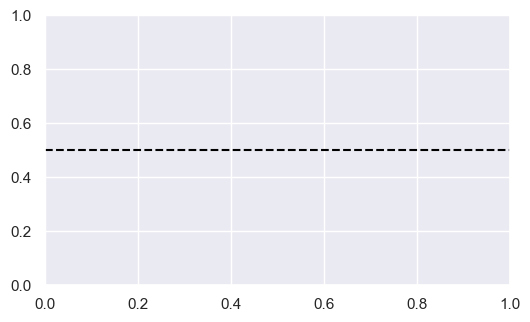

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3.5))
ax.axhline(0.5, color='k', linestyle='--')
# Calcalte the probability of begin in state 1 from the forward tracker
p1_fwd = [p[1] for p in est.forward_tracker]
ax.plot(p1_fwd[:40])
ax.plot(state_ts[:40], 'o', color=sns.xkcd_rgb["shamrock"], markersize=7, alpha=0.6)
ax.plot(obs_ts[:40], 'o',color=sns.xkcd_rgb["tangerine"], markersize=4, alpha=0.6)

ax.set_ylim([-0.05,1.05])
